#Evaluating models and learning speed

In [130]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import numpy as np

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [17]:
rawtable.roomType.value_counts()

0    19836
1    12314
2      893
dtype: int64

In [19]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings_test', engine, index_col='id')
Xtr3, Xte3, ytr3, yte3 = get_training_test_set(rawtable, make_features=make_features3)

In [34]:
rawtable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33043 entries, air100002 to air999977
Data columns (total 88 columns):
amenity0            33043 non-null int64
amenity1            33043 non-null int64
amenity2            33043 non-null int64
amenity3            33043 non-null int64
amenity4            33043 non-null int64
amenity5            33043 non-null int64
amenity6            33043 non-null int64
amenity7            33043 non-null int64
amenity8            33043 non-null int64
amenity9            33043 non-null int64
amenity10           33043 non-null int64
amenity11           33043 non-null int64
amenity12           33043 non-null int64
amenity13           33043 non-null int64
amenity14           33043 non-null int64
amenity15           33043 non-null int64
amenity16           33043 non-null int64
amenity17           33043 non-null int64
amenity18           33043 non-null int64
amenity19           33043 non-null int64
amenity20           33043 non-null int64
amenity21           330

In [21]:
clf_dummy = get_dummy_clf()

In [22]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

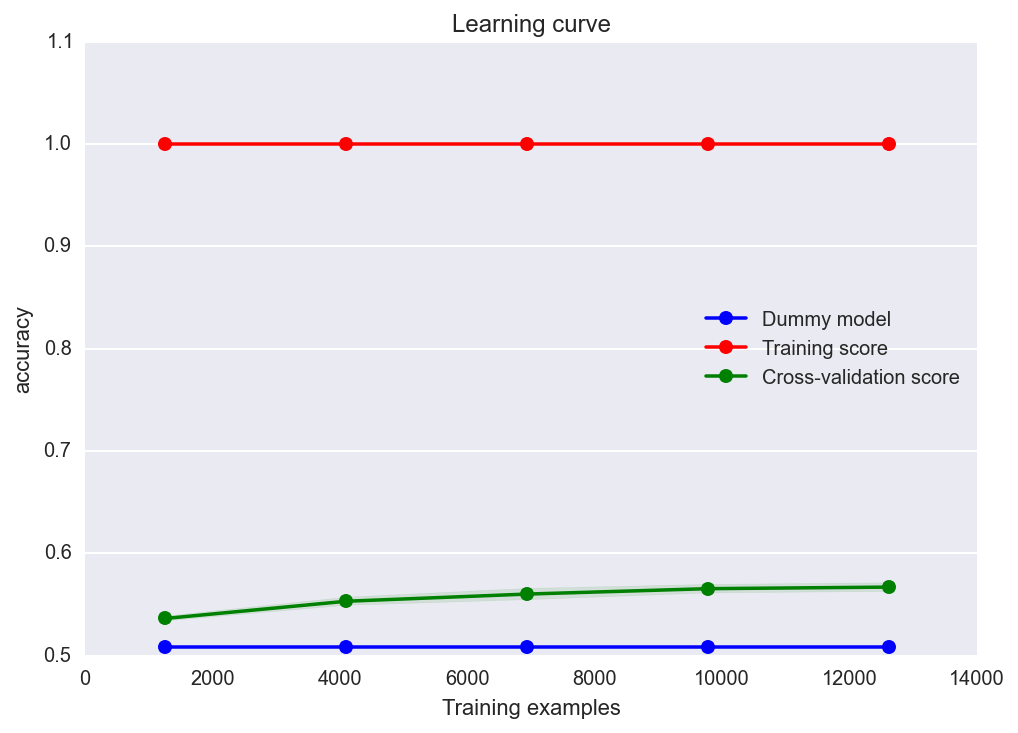

In [23]:
plot_learning_curve(clf5, "Learning curve", Xtr3, ytr3, dummy=clf_dummy)

In [24]:
def make_weight(y):
    weight_dict = dict(1/y.value_counts())
    return y.map(weight_dict)
def class_weighted_accuracy_score(estimator, X, y):
    return skl.metrics.accuracy_score(y, estimator.predict(X), sample_weight=make_weight(y))

In [29]:
dummy_stratified = skl.dummy.DummyClassifier(strategy='stratified')

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

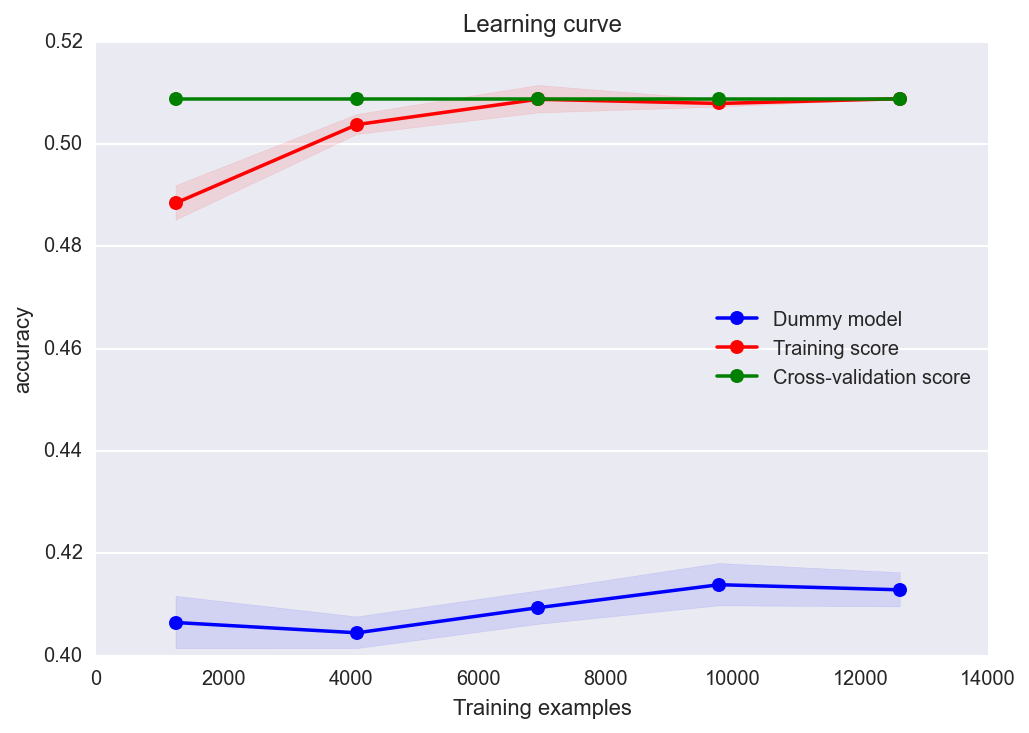

In [30]:
plot_learning_curve(clf_dummy, "Learning curve", Xtr3, ytr3, dummy=dummy_stratified)

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

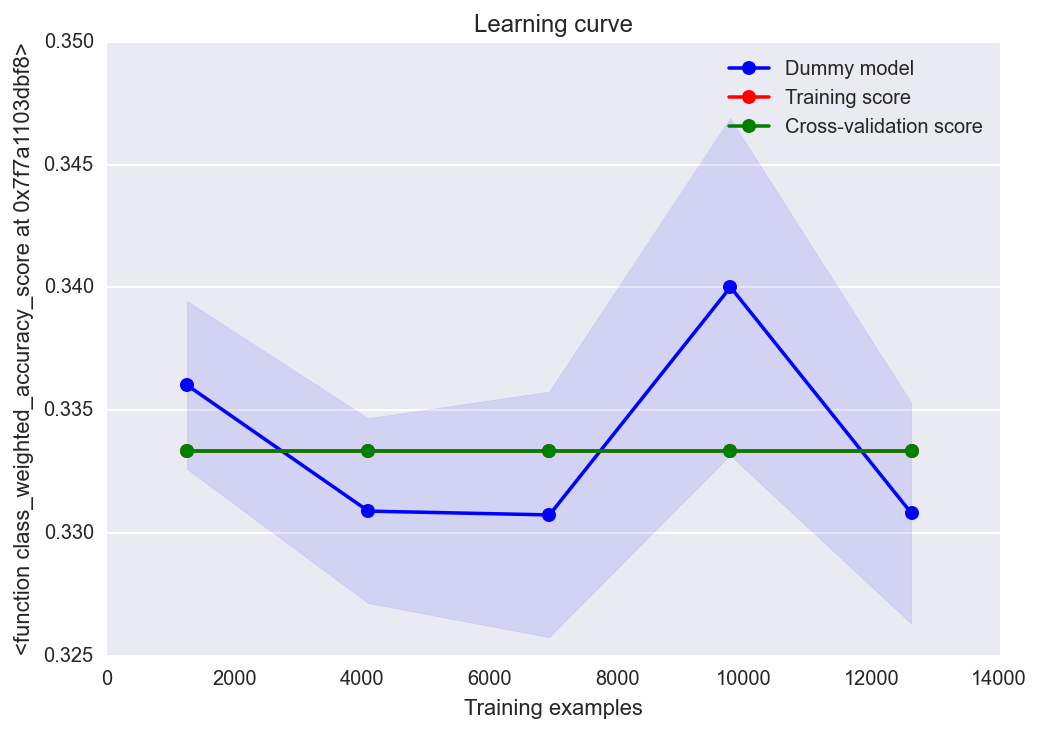

In [31]:
# Once classes are re-weighted, random guessing (Stratified) and most frequent do the same
plot_learning_curve(clf_dummy, "Learning curve", Xtr3, ytr3, scoring=class_weighted_accuracy_score,
                   dummy=dummy_stratified)

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

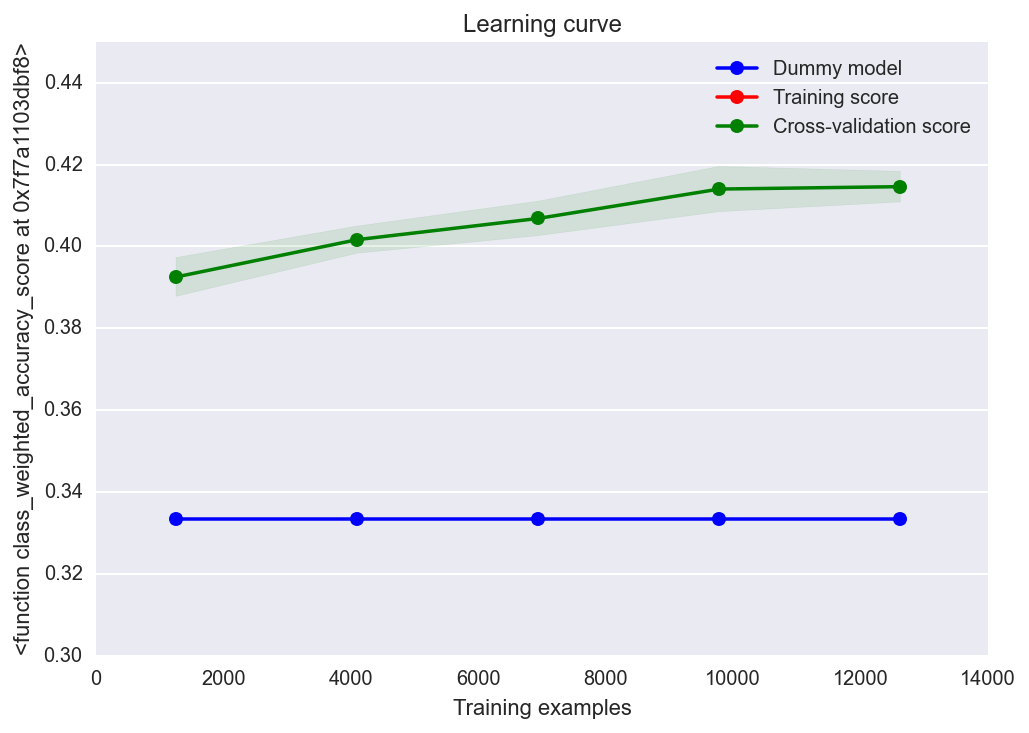

In [35]:
plot_learning_curve(clf5, "Learning curve", Xtr3, ytr3, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.3, 0.45])

In [36]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features3)

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

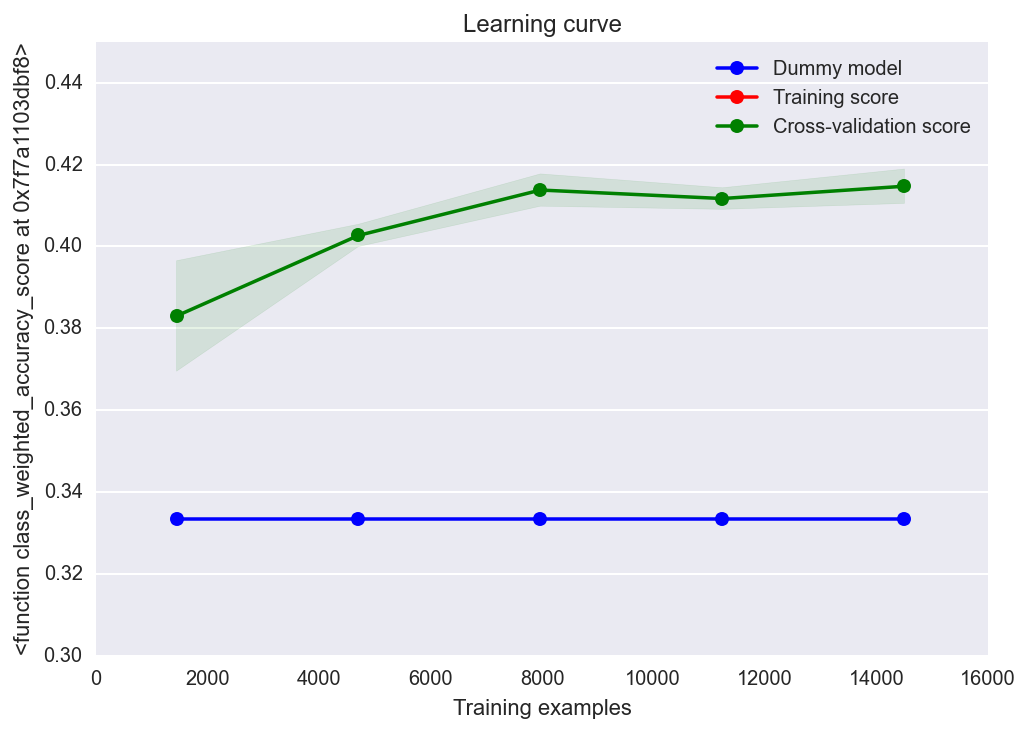

In [38]:
plot_learning_curve(clf5, "Learning curve", Xtr, ytr, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.3, 0.45])

In [39]:
print(len(Xtr3))
print(len(Xtr))

18929
21743


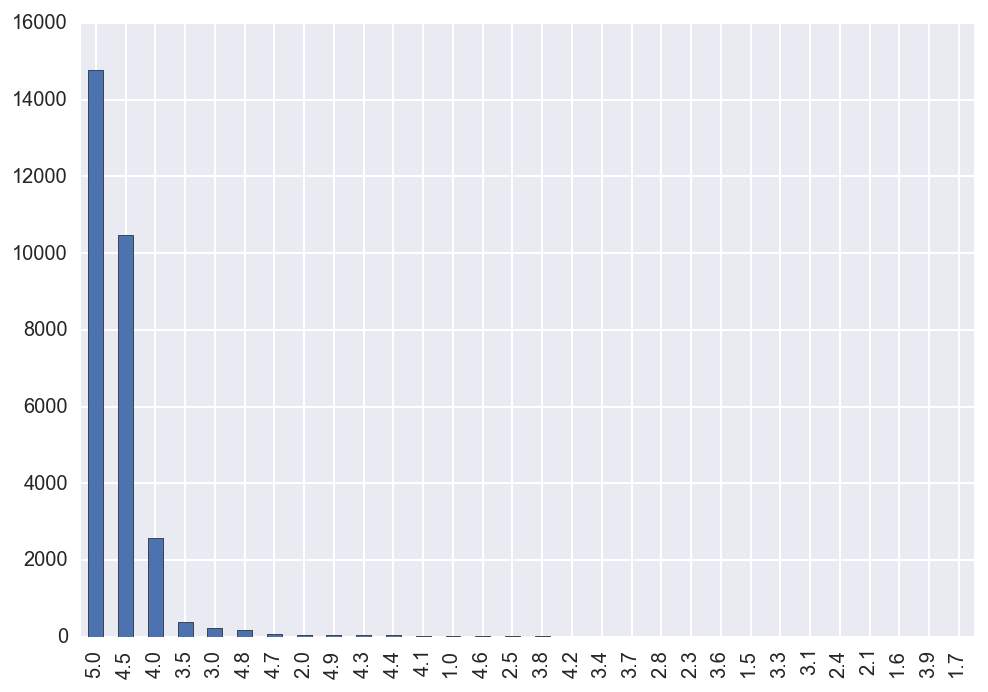

In [40]:
rawtable.rating.value_counts().plot(kind='bar')

In [46]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr2, Xte2, ytr2, yte2 = get_training_test_set(rawtable, make_features=make_features3, 
                                               categorize_rating=categorize_rating2)

In [47]:
ytr2.value_counts()

4.25+    19228
4.25-     2515
dtype: int64

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

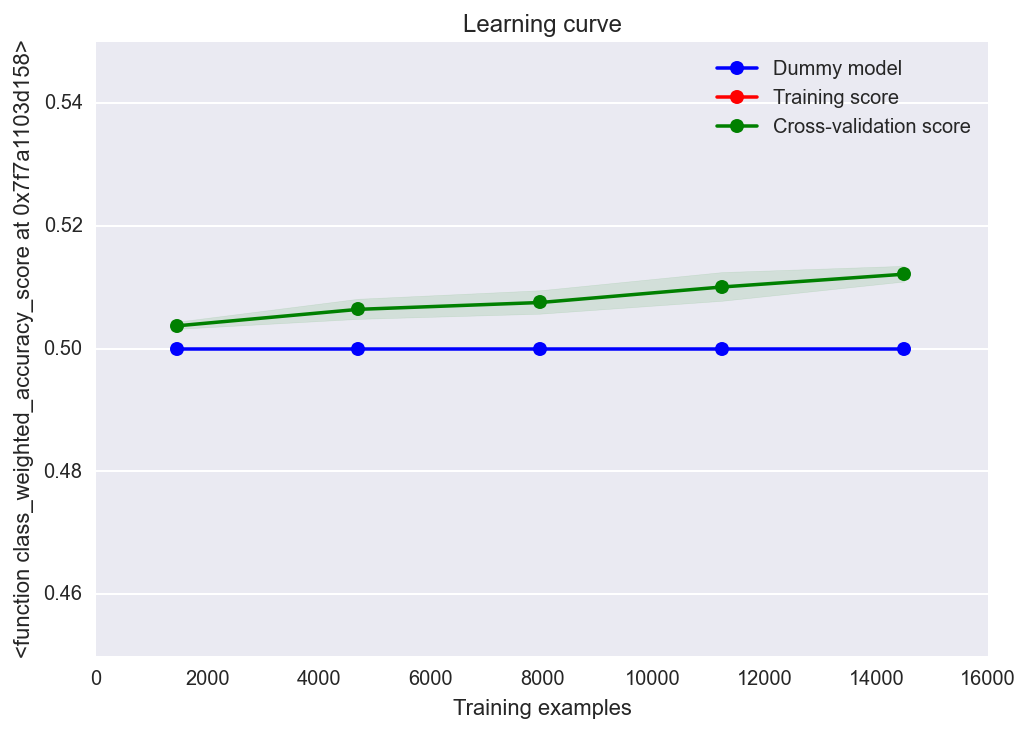

In [50]:
plot_learning_curve(clf5, "Learning curve", Xtr2, ytr2, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.45, 0.55])

In [53]:
clf5.fit(Xtr, ytr)
clf5.named_steps['clf'].feature_importances_

array([  3.56323604e-03,   4.44411220e-03,   8.50221922e-03,
         0.00000000e+00,   9.66404167e-03,   0.00000000e+00,
         3.40783307e-03,   0.00000000e+00,   8.66623309e-03,
         4.92819669e-03,   3.48170059e-03,   6.98417696e-03,
         0.00000000e+00,   4.21408539e-03,   0.00000000e+00,
         3.60783842e-03,   6.80402622e-03,   6.18230330e-03,
         2.78469483e-03,   3.84992344e-03,   3.30139359e-03,
         8.07420338e-03,   1.95208843e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

Photo Comments and description are useful so make some simple NLP features!

([<matplotlib.axis.XTick at 0x7f79fb8238d0>,
 <a list of 10 Text xticklabel objects>)

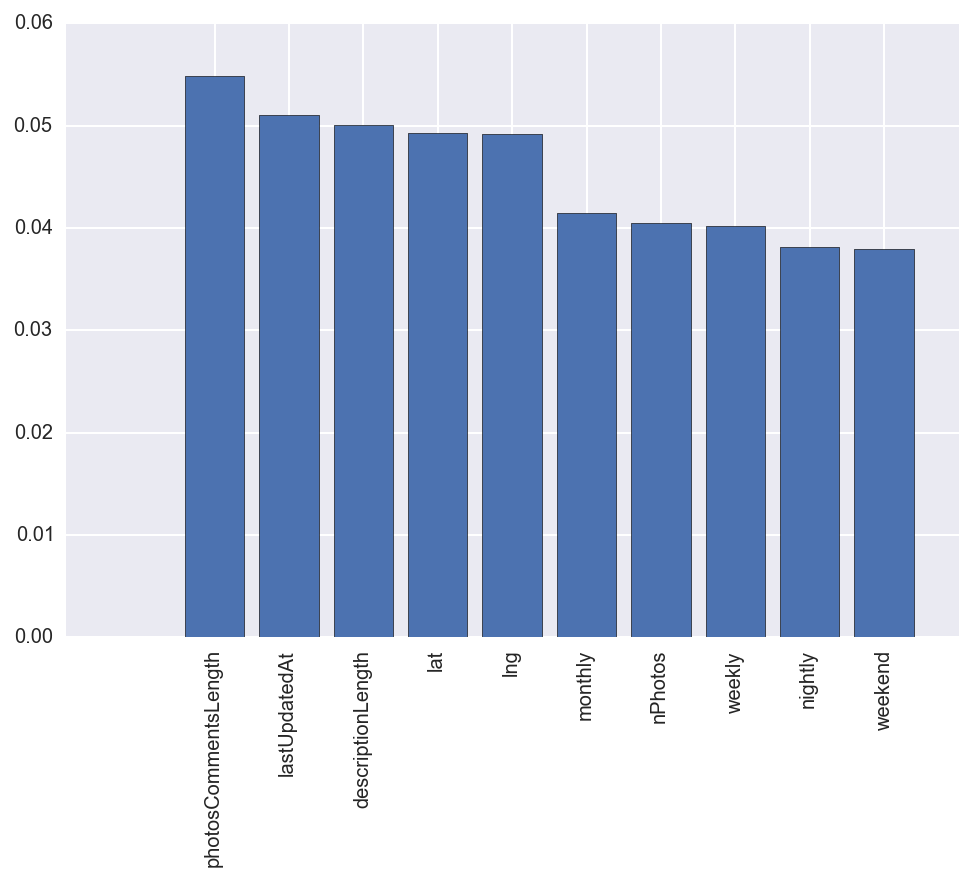

In [54]:
importance = clf5.named_steps['clf'].feature_importances_
ind = importance.argsort()[::-1]  # reverse order
n_features_plot = 10
plt.bar(range(n_features_plot), importance[ind][:n_features_plot], align='center')
plt.xticks(range(n_features_plot), Xtr.columns[ind][:n_features_plot], rotation=90 )

#Feature engineering

In [55]:
len(rawtable)

37338

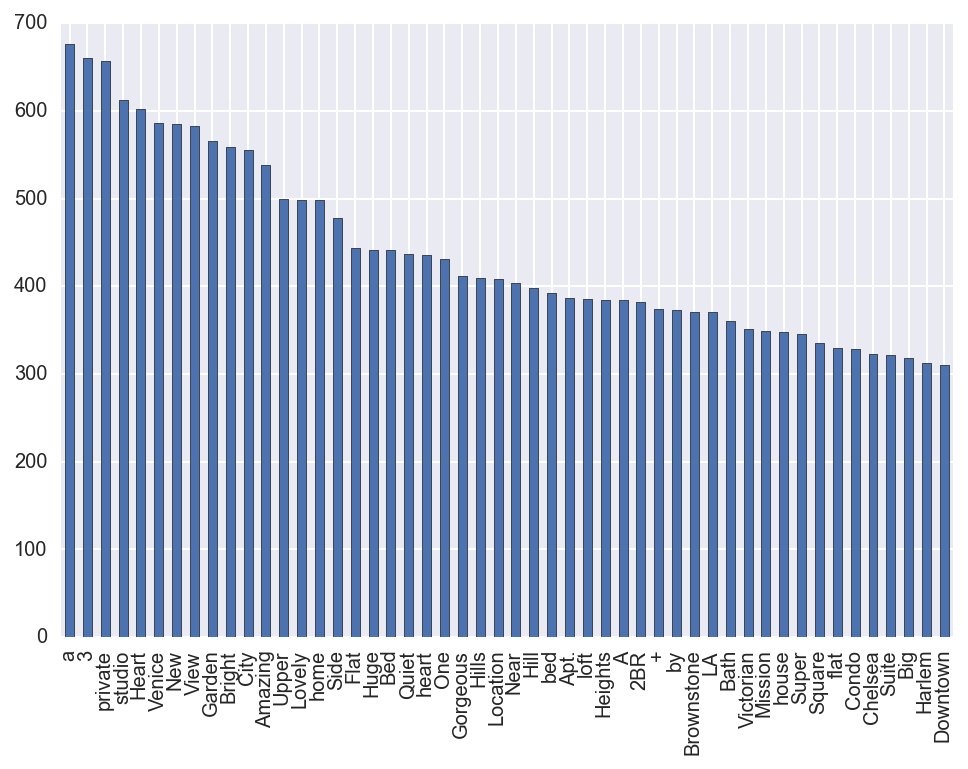

In [62]:
pd.Series(' '.join(rawtable.heading).split()).value_counts().head(100).tail(50).plot(kind='bar')

In [61]:
pd.Series(' '.join(rawtable.heading).split()).value_counts().head(100).index

Index(['in', 'Room', 'Private', '1', 'room', 'Bedroom', '2', 'Studio', 'Apt',
       'to', 'Apartment', 'Cozy', '-', '&', 'the', 'of', 'with', 'Beautiful',
       'Spacious', 'bedroom', 'Park', 'East', 'Village', 'Sunny', 'NYC',
       'Loft', 'Charming', 'Hollywood', 'Modern', 'and', 'Luxury', 'Brooklyn',
       'West', 'Large', 'apt', 'Beach', 'Home', 'apartment', 'Great', 'for',
       'near', 'Williamsburg', 'Manhattan', 'House', 'from', 'Central', 'BR',
       '1BR', 'The', 'on', 'a', '3', 'private', 'studio', 'Heart', 'Venice',
       'New', 'View', 'Garden', 'Bright', 'City', 'Amazing', 'Upper', 'Lovely',
       'home', 'Side', 'Flat', 'Huge', 'Bed', 'Quiet', 'heart', 'One',
       'Gorgeous', 'Hills', 'Location', 'Near', 'Hill', 'bed', 'Apt.', 'loft',
       'Heights', 'A', '2BR', '+', 'by', 'Brownstone', 'LA', 'Bath',
       'Victorian', 'Mission', 'house', 'Super', 'Square', 'flat', 'Condo',
       'Chelsea', 'Suite', 'Big', 'Harlem', 'Downtown'],
      dtype='object')

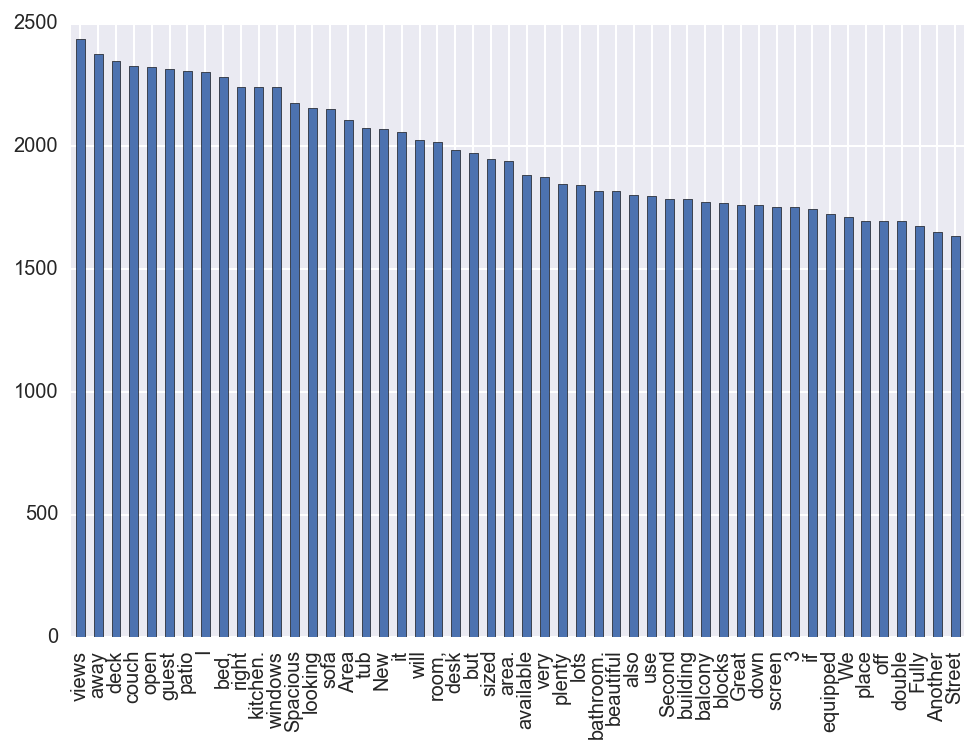

In [66]:
pd.Series(' '.join(rawtable.photosComments).split()).value_counts().head(150).tail(50).plot(kind='bar')

In [67]:
pd.Series(' '.join(rawtable.photosComments).split()).value_counts().head(100).index

Index(['the', 'and', 'with', 'of', 'to', 'a', 'room', 'in', 'from', 'The',
       'is', 'for', 'bedroom', 'Living', 'living', 'Bedroom', 'kitchen',
       'Kitchen', 'bed', 'view', 'on', 'Room', 'your', 'bathroom', 'you',
       'area', 'View', '-', 'Bathroom', 'size', 'Master', '&', '2', 'at',
       'dining', 'Dining', 'or', 'has', 'TV', 'space', 'full', 'private',
       'our', 'out', 'room.', 'This', 'shower', 'table', 'Queen', 'can',
       'Full', 'A', 'are', 'queen', 'front', 'large', 'all', 'this', 'Private',
       'into', 'door', 'Large', 'up', 'that', 'closet', 'as', 'have', '1',
       'new', 'Your', 'bed.', 'by', 'great', 'floor', 'garden', 'light',
       'bath', 'be', 'back', 'coffee', 'comfortable', 'window', 'Front', 'two',
       'apartment', 'just', 'walk', 'my', 'Bed', 'Guest', 'one', 'master',
       'Park', 'entrance', '2nd', 'Our', 'bedroom.', 'street', 'house', 'an'],
      dtype='object')

In [69]:
# Bag of 100 words for heading and photo comments
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr4, Xte4, ytr4, yte4 = get_training_test_set(rawtable, make_features=make_features3, 
                                               categorize_rating=categorize_rating2)

In [70]:
Xtr4

,amenity0,amenity1,amenity2,amenity3,amenity4,amenity5,amenity6,amenity7,amenity8,amenity9,...,one_in_photoComments,master_in_photoComments,Park_in_photoComments,entrance_in_photoComments,2nd_in_photoComments,Our_in_photoComments,bedroom._in_photoComments,street_in_photoComments,house_in_photoComments,an_in_photoComments
id,,,,,,,,,,,,,,,,,,,,,
air3414843,1,1,1,0,0,0,0,0,1,0,...,True,False,True,False,False,False,False,False,False,True
air4190425,1,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
air1198681,1,0,1,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
air2866967,1,0,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
air934619,1,0,0,0,1,0,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
air1254958,1,0,1,0,0,0,0,0,1,0,...,False,False,True,False,False,False,False,True,False,False
air1822559,1,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,True,True
air3115570,1,0,1,0,1,0,0,0,1,0,...,True,False,False,False,False,False,False,False,False,True
air552726,1,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

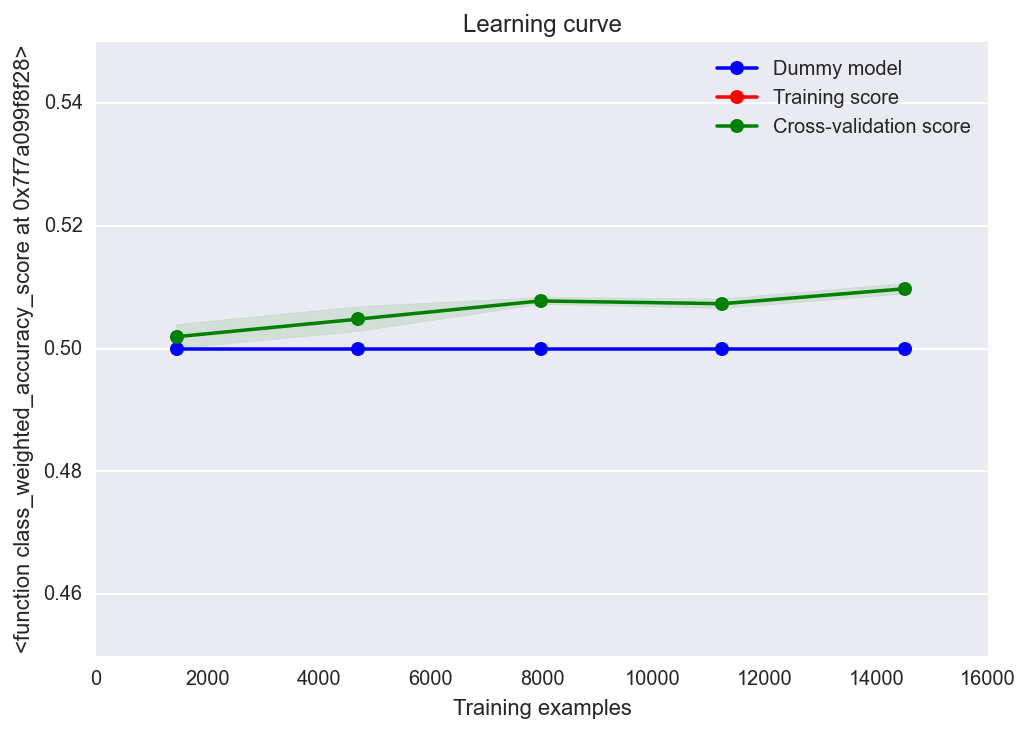

In [71]:
plot_learning_curve(clf5, "Learning curve", Xtr4, ytr4, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.45, 0.55])

In [76]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__n_estimators': [100, 1000], 'clf__max_features': [10, 100]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr4, ytr4)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  4.9min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__n_estimators': [100, 1000], 'clf__max_features': [10, 100]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7f7a10e51ae8>,
       verbose=1)

Some sensitivity to max_features, very little to number of trees

In [78]:
gridclf5.grid_scores_

[mean: 0.50951, std: 0.00225, params: {'clf__n_estimators': 100, 'clf__max_features': 10},
 mean: 0.50929, std: 0.00078, params: {'clf__n_estimators': 1000, 'clf__max_features': 10},
 mean: 0.51271, std: 0.00100, params: {'clf__n_estimators': 100, 'clf__max_features': 100},
 mean: 0.51276, std: 0.00042, params: {'clf__n_estimators': 1000, 'clf__max_features': 100}]

In [72]:
ytr4.value_counts()

4.25+    19229
4.25-     2514
dtype: int64

In [84]:
Xtr4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21743 entries, air3414843 to air1588695
Columns: 293 entries, amenity0 to an_in_photoComments
dtypes: bool(200), float64(22), int64(71)
memory usage: 19.7+ MB


Headings and photo comments are short, counts of words unlikely to be useful

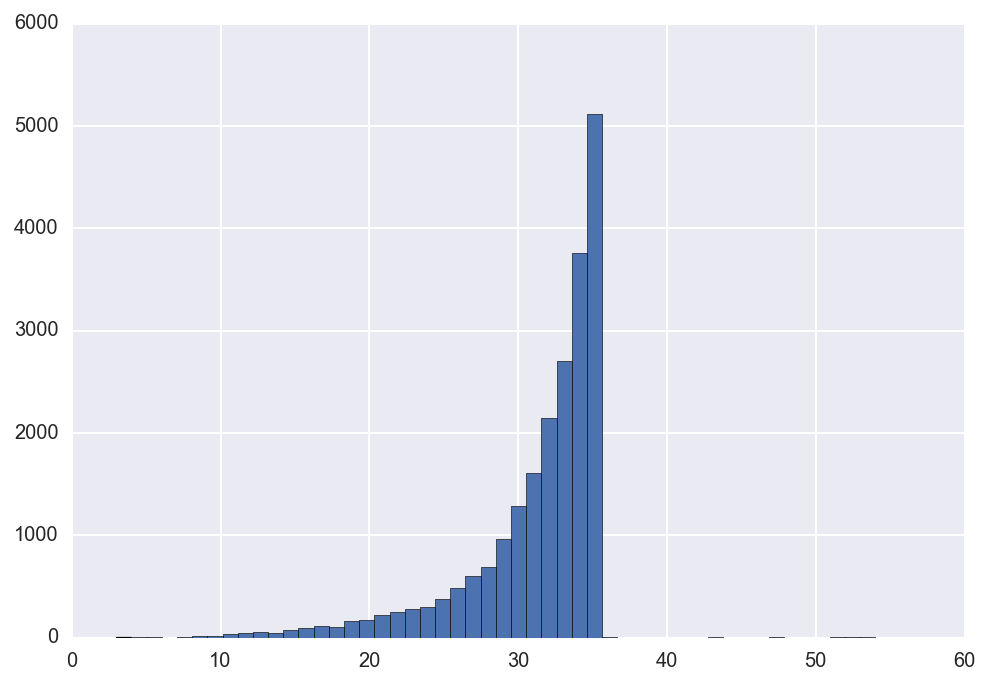

In [87]:
Xtr4.headingLength.hist(bins=50)

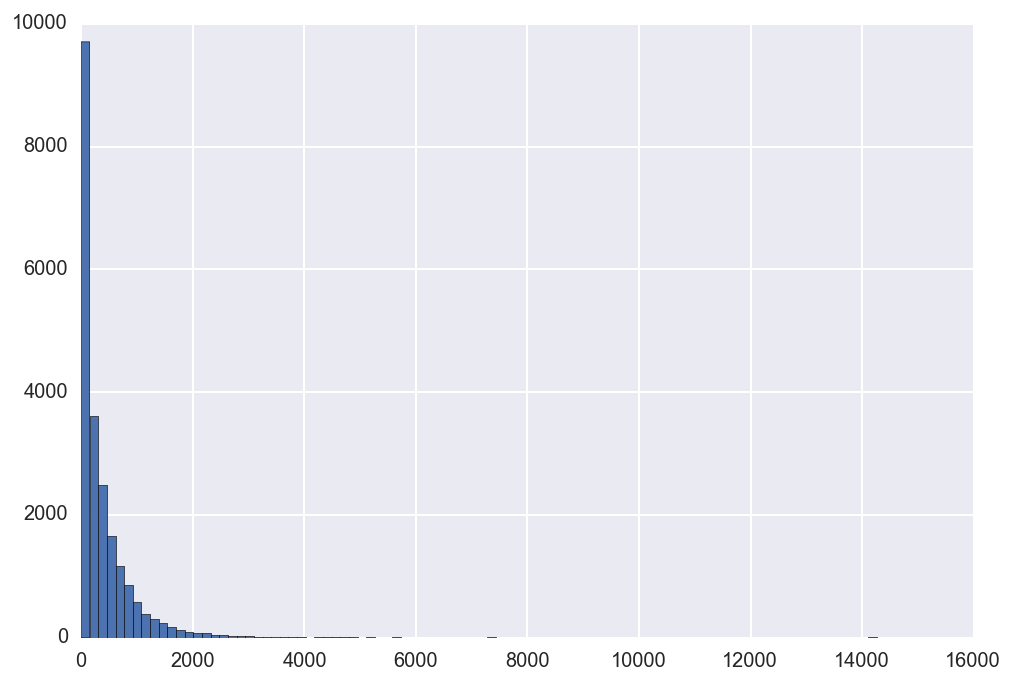

In [89]:
Xtr4.photosCommentsLength.hist(bins=100)

In the description, even conjunctions might indicate something about the owner (e.g. writing style which could correlate with conscientiousness). Word counts might be useful

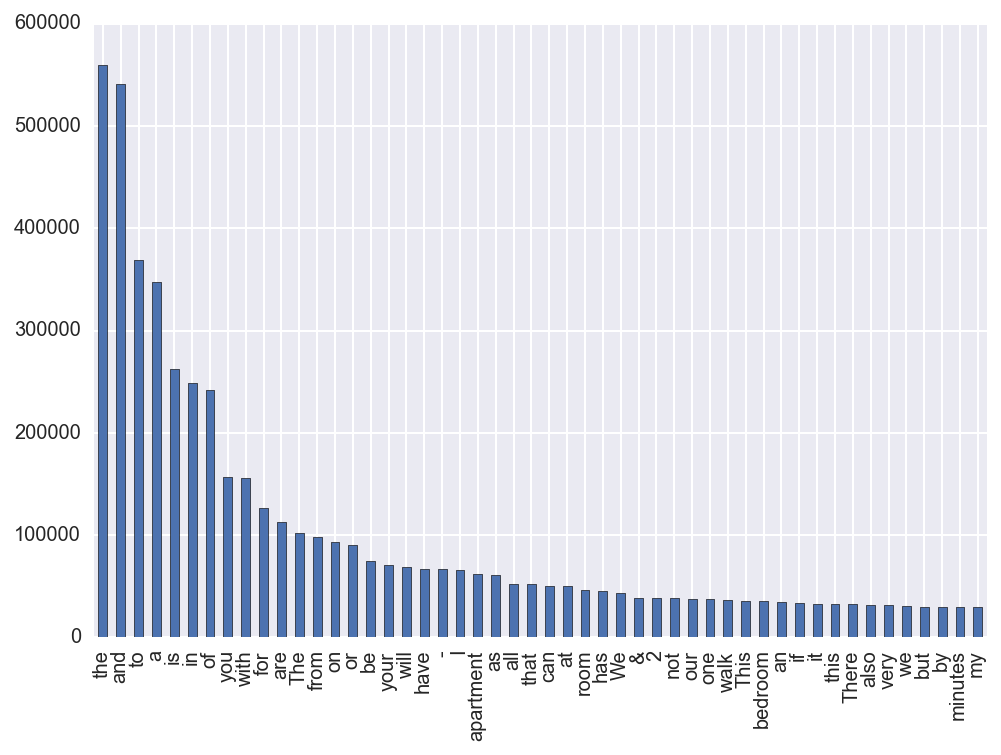

In [123]:
pd.Series(' '.join(rawtable.description).split()).value_counts().head(50).tail(50).plot(kind='bar')

In [124]:
# Should we consider uppercase to be different words?
vectorizer = sklearn.feature_extraction.text.CountVectorizer(max_features=200)

In [125]:
vectorizer.fit(rawtable.description)
#word_counts = vectorizer.transform(rawtable.description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=200, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [122]:
vectorizer.vocabulary_.keys() # 100 features

dict_keys(['apartment', 'on', 'block', 'which', 'your', 'and', 'houserules', 'for', 'away', 'room', 'train', 'or', 'walk', 'great', 'new', 'home', 'space', 'you', 'so', 'bars', 'tv', 'other', 'up', 'with', 'available', 'guest', 'very', 'minutes', 'full', 'as', 'access', 'will', 'located', 'place', 'bus', 'the', 'we', 'quiet', 'subway', 'restaurants', 'an', 'bathroom', 'our', 'living', 'guests', 'but', 'street', 'stay', 'kitchen', 'it', 'neighborhood', '10', 'in', 'all', 'if', 'park', 'floor', 'has', 'area', 'bedroom', 'private', 'is', 'smoking', 'do', 'of', 'that', 'parking', 'be', 'to', 'out', 'no', 'also', 'please', 'only', 'blocks', 'large', 'free', 'can', 'from', 'have', 'clean', 'any', 'two', 'close', 'there', 'my', 'this', 'house', 'manhattan', 'not', 'just', 'bed', 'are', 'use', 'walking', 'building', 'city', 'by', 'one', 'at'])

In [129]:
vectorizer.vocabulary_.keys() # 200 features

dict_keys(['apartment', 'on', 'check', 'bath', 'spacious', 'block', 'which', 'time', 'size', 'your', 'nyc', 'more', 'views', 'and', 'like', 'houserules', 'transportation', 'people', 'within', 'coffee', 'property', 'for', 'away', 'room', 'train', 'or', 'central', 'walk', 'great', 'flat', 'new', 'where', 'downtown', 'internet', 'home', 'space', 'towels', 'you', 'so', 'garden', 'bars', 'tv', 'other', 'up', 'with', 'available', 'guest', 'very', 'minutes', 'll', 'beach', 'want', 'full', 'as', 'into', 'access', 'will', 're', 'stop', 'located', 'high', 'place', 'bus', 'the', 'etc', 'we', 'quiet', 'enjoy', 'subway', 'restaurants', 'unit', 'brooklyn', 'an', 'bathroom', 'night', 'most', 'beautiful', 'dining', 'may', 'safe', 'la', 'our', 'living', 'guests', 'but', 'street', 'when', 'square', 'stay', 'hollywood', 'small', 'dryer', 'kitchen', 'it', 'car', 'neighborhood', '15', 'village', 'side', 'well', '10', 'in', 'all', 'if', 'park', 'during', 'floor', 'studio', 'has', 'center', 'area', 'after', 

In [118]:
word_counts.toarray()[0,35]

4

In [119]:
rawtable.description[0]

'I rent out a bedroom  1 or 2 people only, in Manhattan, the room is nice and charming with lot of natural daylight, spacious, cozy. The  place has WiFi . The room has a Full bed, 42" flat screen TV set, and A/C, Bathroom  with bathtub and I provide bath towels, also  you can use the kitchen for light cooking and the refrigerator to cool drinks and keep some food.  Located close to Fort Tryon Park: "The Cloisters". Yeshiva University and The George Washington Bridge/. Near Subway station 181th st. with "A" Express and No.1 line, just 22 minutes to 42th st TIMES SQUARE. Nice and safe neighborhood. You find a convenient place close to the "A" train subway line that run all the west side of Manhattan so very convenient to hang out in the city. During the day till  10 pm the "A" line run Express.\nThere are many Latin restaurants few blocks away and  also new spots of different kind of food have been opened lately. \nIf you need some directions or help about how to move in the city and pla

##Does description bag of words help?

In [131]:
# Bag of 100 words for heading and photo comments
# +200 words description
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr5, Xte5, ytr5, yte5 = get_training_test_set(rawtable, make_features=make_features3, 
                                               categorize_rating=categorize_rating2)

In [134]:
Xtr5.head()

,amenity0,amenity1,amenity2,amenity3,amenity4,amenity5,amenity6,amenity7,amenity8,amenity9,...,walking_in_description,distance_in_description,make_in_description,building_in_description,city_in_description,by_in_description,one_in_description,at_in_description,day_in_description,west_in_description
id,,,,,,,,,,,,,,,,,,,,,
air864328,1,0,1,0,1,0,1,0,0,0,...,2,2,0,4,0,0,0,2,0,0
air2836450,1,0,0,0,1,0,0,0,0,0,...,3,2,0,0,0,3,0,0,0,0
air3155385,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,1
air268549,1,0,1,0,1,0,0,0,0,0,...,1,1,0,2,0,1,3,3,0,1
air990208,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,2,1,2,0,0


In [135]:
clf5

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

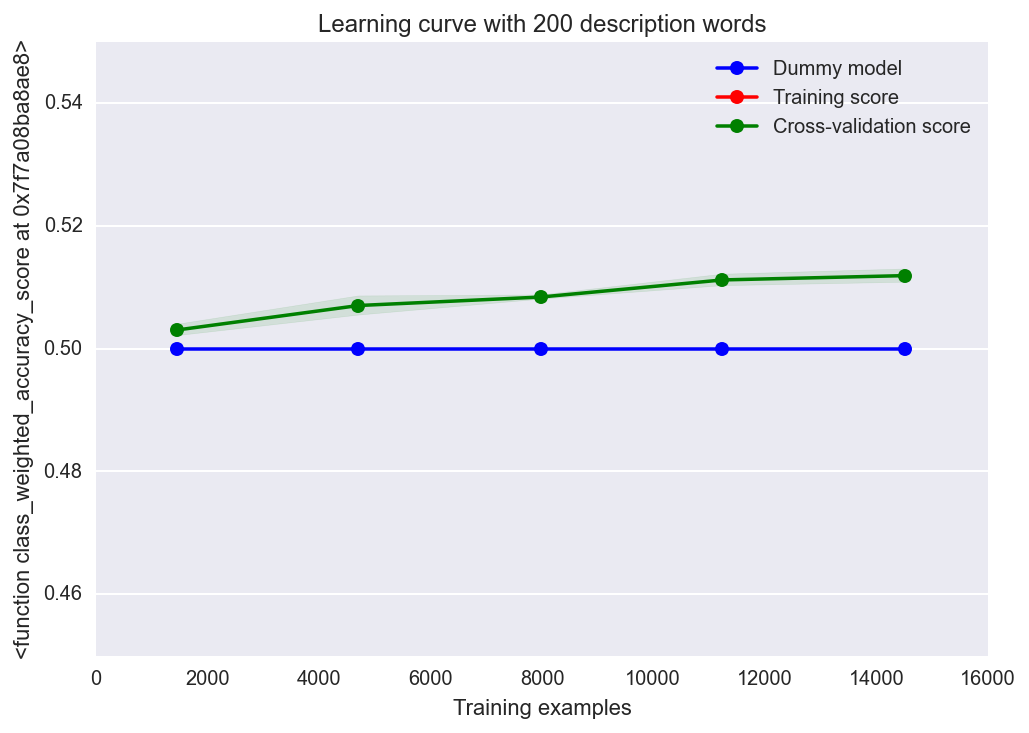

In [136]:
plot_learning_curve(clf5, "Learning curve with 200 description words", Xtr5, ytr5, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.45, 0.55])

#Most listings are recently updated

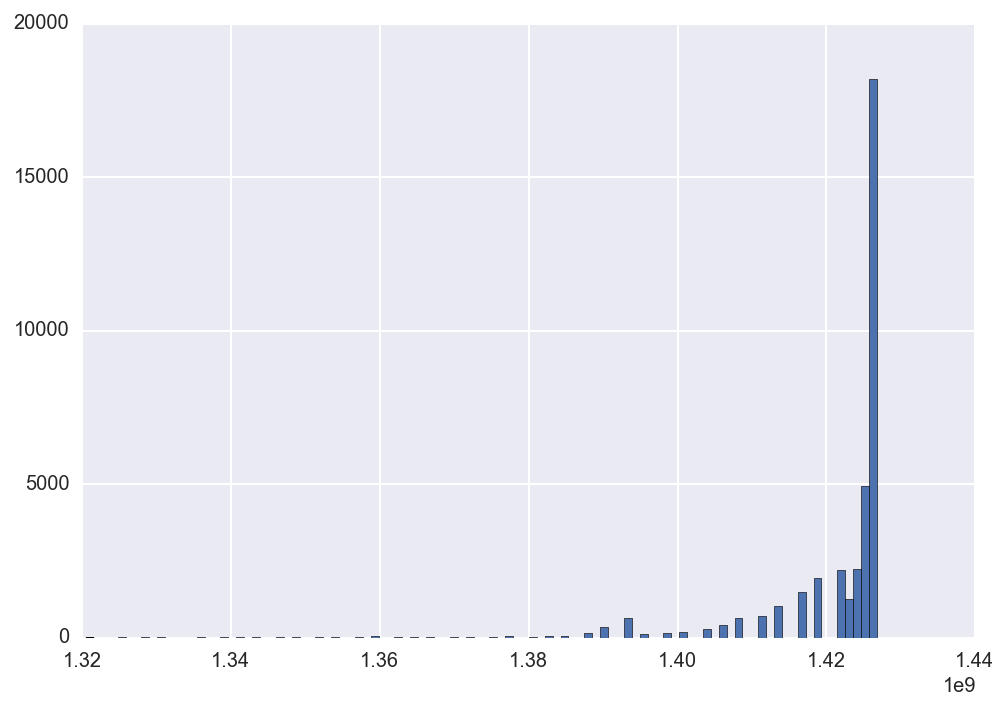

In [82]:
rawtable.lastUpdatedAt.hist(bins=100)

In [83]:
rawtable.lastUpdatedAt.max()

1426768834

Corresponds to March 19, 2015 (unix time)